<a href="https://colab.research.google.com/github/sohrabalexmofid/CancerDetection_HealthCare/blob/main/cancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/AI & Machine Learning/Capstone Projects/Health Care/data.csv"
path2 = "/content/drive/MyDrive/AI & Machine Learning/Capstone Projects/Health Care/labels.csv"
Data = pd.read_csv(path)
labels = pd.read_csv(path2)
df = pd.merge(Data,labels)
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [ ]:
df.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_heatmap = pd.pivot_table(df, index=["Class"])
df_heatmap

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


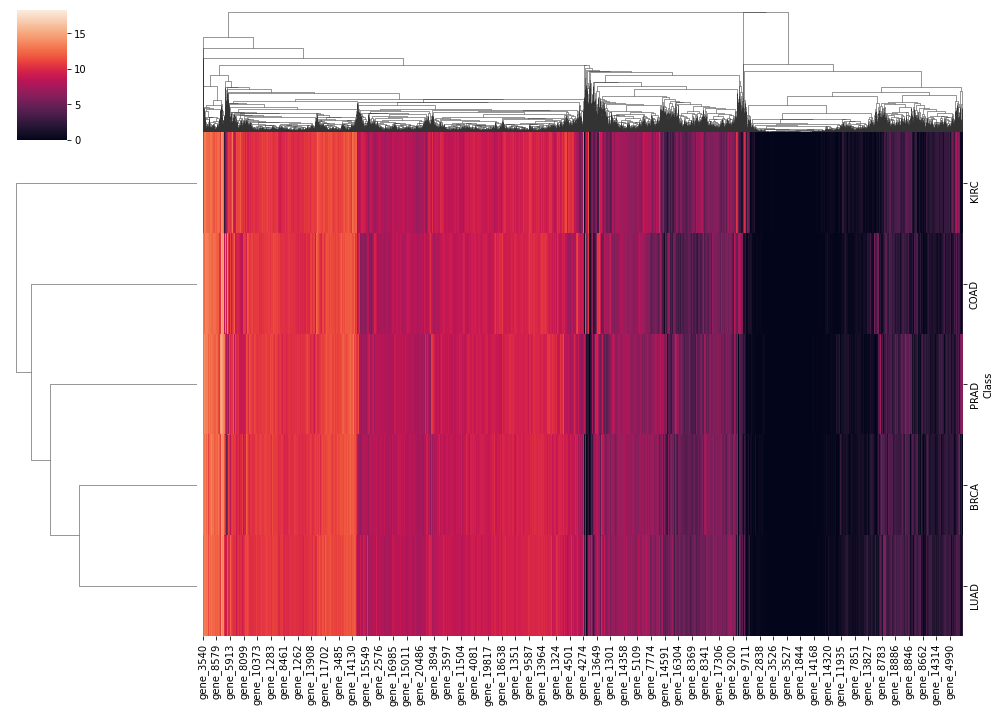

In [ ]:
sns.clustermap(df_heatmap, figsize=(14,10))

Sort the multi-class categorical variable and create oridinal categorical type called cancer types.


In [ ]:
df['Class'].value_counts().sort_values(ascending=False)

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
df['cancer_types'] = df['Class'].map({'BRCA': 1, 'KIRC': 2,'LUAD': 3, 'PRAD': 4, 'COAD': 5})


Performing dimensionality reduction using various techniques:

**Principle Component Analysis (PCA)**, **Linear Discriminant Analysis (LDA)**, and **t-SNE**.

In [ ]:
df_pca = df.drop(columns=['Unnamed: 0','Class'], axis=1)

In [ ]:
df_pca.shape

(801, 20532)

In [ ]:
x_pca = df_pca.values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(x_pca)

Perform **PCA** with n_components=2 and visualize on 2D for all 5 unique cancer types.


In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
pca_data = pca_model.fit_transform(X_pca_scaled)
pca_data.shape

(801, 2)

In [ ]:
pca_d = pd.DataFrame(pca_data)
pca_d.columns = ['pca_1','pca_2']
pca_d.loc[:,'cancer_types']= df['cancer_types']

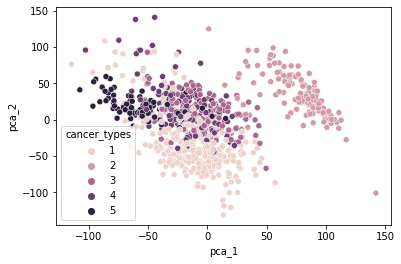

In [ ]:
sns.scatterplot(x='pca_1',y='pca_2', hue = 'cancer_types',data=pca_d)
plt.show()

In [ ]:
pca_95= PCA(.95)
X_pca_95 = pca_95.fit_transform(x_pca)
X_pca_95.shape
X_pca_95

array([[-62.75955465, -94.03525388,  89.564534  , ...,  -2.63995579,
          0.48630353,   2.78977671],
       [ -2.43384638,  90.58661804,  -1.08810818, ...,  -1.31850847,
          4.14460199,   2.22598917],
       [-71.27038784,  -8.03764227,  66.11653137, ...,  -2.98301258,
          1.86283101,   0.35828126],
       ...,
       [ 10.4819589 ,  21.59196965,  41.39468502, ...,  -0.82705367,
          0.55602616,   2.11367957],
       [-55.06751817, -92.36138449,  80.10033856, ...,   1.86290113,
          5.778344  ,   0.74338421],
       [-49.1058766 , -50.97904734,  40.55233916, ...,   2.86223222,
          2.03662027,   0.535412  ]])

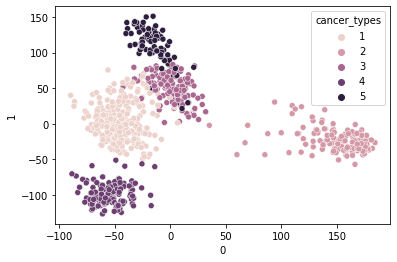

In [ ]:
df_pca_95 = pd.DataFrame(X_pca_95)
df_pca_95.loc[:,'cancer_types']= df['cancer_types']
sns.scatterplot(x=0,y=1,hue = 'cancer_types', data=df_pca_95)
plt.show()

Perform **LDA** with Class as target, LDA is supervised method as opposed to PCA (unsupervised), n_components=2 and visualize on 2D for all 5 unique cancer types.


In [ ]:
df_lda = df.drop(['Class','Unnamed: 0','cancer_types'], axis=1)
x_lda = df_lda
y_lda = df['Class']


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_model = LDA(n_components=2)
lda_data = lda_model.fit(x_lda,y_lda).transform(x_lda)
lda_data.shape

(801, 2)

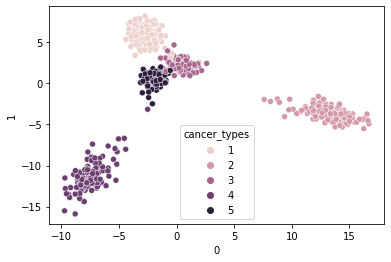

In [ ]:
lda_d = pd.DataFrame(lda_data)
lda_d.loc[:,'cancer_types']= df['cancer_types']
sns.scatterplot(x=0, y=1, hue='cancer_types', data=lda_d)
plt.show()

In [ ]:
df_tSNE = df.drop(['Class','Unnamed: 0','cancer_types'], axis=1) 

In [ ]:
from sklearn.manifold import TSNE
tSNE_model = TSNE(n_components=2, learning_rate='auto',init='random')
tSNE_data = tSNE_model.fit_transform(df_tSNE)

In [ ]:
tSNE_data.shape

(801, 2)

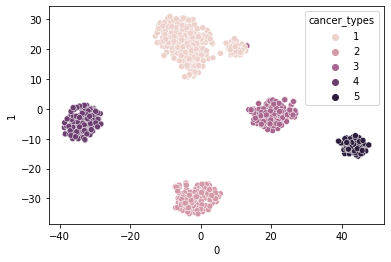

In [ ]:
tSNE_d = pd.DataFrame(tSNE_data)
tSNE_d.loc[:,"cancer_types"]= df['cancer_types']
sns.scatterplot(x=0, y=1, hue='cancer_types', data=tSNE_d)
plt.show()

2- Applying **K-means**, **hierarchical** and **mean shift clustering**, on genes and samples to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type.

Kmeans clustering with PCA 

In [ ]:
from sklearn.cluster import KMeans
clusters = KMeans(5, n_init = 5)
clusters.fit(pca_data)
clusters.labels_

array([3, 1, 0, 0, 2, 0, 4, 1, 2, 0, 1, 4, 1, 3, 2, 2, 1, 4, 4, 0, 2, 1,
       1, 0, 4, 1, 0, 2, 1, 2, 2, 2, 4, 3, 0, 2, 4, 1, 0, 3, 4, 0, 1, 4,
       4, 2, 3, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 4, 1, 1, 1, 2, 1, 0, 0,
       1, 0, 4, 0, 4, 1, 0, 1, 2, 0, 2, 3, 1, 0, 2, 0, 2, 2, 3, 0, 2, 0,
       4, 0, 0, 0, 2, 3, 2, 0, 0, 2, 1, 1, 2, 4, 2, 4, 1, 4, 0, 0, 0, 1,
       3, 2, 1, 0, 2, 4, 4, 4, 2, 2, 1, 4, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0,
       3, 1, 2, 4, 4, 2, 4, 0, 2, 0, 2, 4, 1, 0, 3, 2, 1, 0, 1, 1, 2, 2,
       1, 1, 2, 0, 0, 1, 3, 1, 4, 1, 1, 1, 0, 4, 1, 2, 4, 1, 2, 0, 2, 0,
       1, 1, 1, 4, 0, 4, 2, 1, 0, 1, 1, 1, 2, 1, 1, 4, 3, 2, 0, 2, 3, 2,
       0, 1, 2, 4, 4, 4, 4, 2, 3, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1,
       4, 1, 4, 4, 1, 2, 4, 0, 2, 1, 3, 2, 0, 3, 4, 1, 4, 0, 1, 4, 4, 2,
       0, 1, 1, 0, 4, 1, 1, 0, 2, 0, 1, 1, 1, 4, 3, 1, 1, 2, 1, 0, 1, 0,
       0, 0, 1, 2, 2, 4, 4, 2, 0, 3, 4, 0, 2, 2, 4, 2, 2, 2, 3, 0, 1, 2,
       2, 2, 4, 4, 4, 4, 3, 2, 2, 4, 2, 2, 1, 1, 1,

Build a dataframe with cluster labels, cancer class

In [ ]:
df_Kmeans= pca_d.drop(['cancer_types'], axis=1)
df_Kmeans.loc[:,'Cls_label']= clusters.labels_
df_Kmeans.loc[:, 'Class']= df['Class']
df_Kmeans

,pca_1,pca_2,Cls_label,Class
0,-57.484253,95.396286,3,PRAD
1,-16.921999,0.726963,1,LUAD
2,-70.349738,-19.306711,0,PRAD
3,-49.171033,-9.219326,0,PRAD
4,-18.104740,-51.349731,2,BRCA
...,...,...,...,...
796,-12.390661,-42.345786,2,BRCA
797,-29.427016,28.516217,0,LUAD
798,-4.151801,15.707382,1,COAD
799,-30.837016,33.536101,0,PRAD


In [ ]:
BRCA= df_Kmeans.groupby('Class').get_group('BRCA')
BRCA.Cls_label.value_counts()

2    196
1     49
0     36
3     19
Name: Cls_label, dtype: int64

In [ ]:
KIRC= df_Kmeans.groupby('Class').get_group('KIRC')
KIRC.Cls_label.value_counts()

4    139
1      6
3      1
Name: Cls_label, dtype: int64

In [ ]:
LUAD= df_Kmeans.groupby('Class').get_group('LUAD')
LUAD.Cls_label.value_counts()

1    89
0    38
2     8
3     5
4     1
Name: Cls_label, dtype: int64

In [ ]:
PRAD= df_Kmeans.groupby('Class').get_group('PRAD')
PRAD.Cls_label.value_counts()

0    64
1    48
3    13
2    11
Name: Cls_label, dtype: int64

In [ ]:
COAD= df_Kmeans.groupby('Class').get_group('COAD')
COAD.Cls_label.value_counts()

0    62
3    10
1     6
Name: Cls_label, dtype: int64

In [ ]:
clusters.cluster_centers_

array([[-39.63267101,  16.99342856],
       [  1.14329415,  -0.41765545],
       [ -2.87205542, -53.73417975],
       [-60.82403053,  73.83134856],
       [ 80.52834255,  33.01590266]])

In [ ]:
Cls_Center = pd.DataFrame(clusters.cluster_centers_)
Cls_Center.columns = ['0', '1']

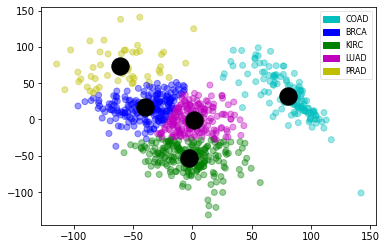

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pca_data)

colors = np.array([x for x in "bgcmyk"])
plt.scatter(x= 'pca_1', y='pca_2',data=pca_d,color=colors[pred_y].tolist(),alpha=0.4 )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300, c='black')
blue_patch = mpatches.Patch(color='b', label='BRCA')
green_patch = mpatches.Patch(color='g', label='KIRC')
red_patch = mpatches.Patch(color='c', label='COAD')
patch_4 = mpatches.Patch(color='m', label='LUAD')
patch_5 =  mpatches.Patch(color='y', label='PRAD')
plt.legend(handles=[red_patch,blue_patch,green_patch,patch_4,patch_5], framealpha=0.5,prop={'size': 8})
plt.show()

Agglomerative Hierarchical Clustering with tSNE

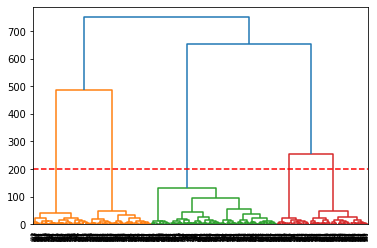

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(tSNE_data, method='ward')
dendrogram(Z)
plt.axhline(y=200, color='r', linestyle='--')
plt.show()

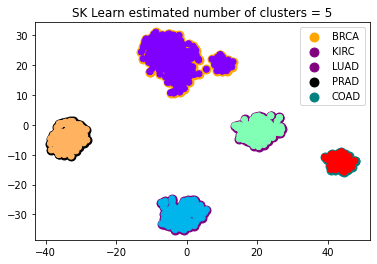

In [ ]:
from sklearn.cluster import AgglomerativeClustering
AHC = AgglomerativeClustering(n_clusters=None,linkage="ward", affinity="euclidean",distance_threshold=200)
pred= AHC.fit_predict(tSNE_data)

plt.scatter(tSNE_data[pred == 0, 0], tSNE_data[pred == 0, 1], s = 80, c = 'orange', label = 'BRCA')
plt.scatter(tSNE_data[pred == 1, 0], tSNE_data[pred == 1, 1], s = 80, c = 'purple', label = 'KIRC')
plt.scatter(tSNE_data[pred == 2, 0], tSNE_data[pred == 2, 1], s = 80, c = 'purple', label = 'LUAD')
plt.scatter(tSNE_data[pred == 3, 0], tSNE_data[pred == 3, 1], s = 80, c = 'black', label = 'PRAD')
plt.scatter(tSNE_data[pred == 4, 0], tSNE_data[pred == 4, 1], s = 80, c = 'teal', label = 'COAD')
plt.scatter(tSNE_data[:,0],tSNE_data[:,1], c=AHC.fit_predict(tSNE_data), cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(AHC.labels_)}")
plt.legend(loc='upper right')
plt.show()

3- build a classification model(s) using multiclass **SVM**, **Random Forest**, and **Deep Neural Network** to classify the input data into five cancer types.

In [ ]:
x = lda_d.drop('cancer_types', axis=1)
Y = df['cancer_types']
x.shape, Y.shape

((801, 2), (801,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size=0.3, random_state=52)

In [ ]:
results ={}

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.0001, 0.001, 0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.00001]}
clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
clf_grid.fit(x_train, y_train)
print("Best Estimators:\n", clf_grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Estimators:
 SVC(C=1, gamma=0.1)


In [ ]:
SVC_clf = SVC(gamma= 0.1, C= 1)
SVC_clf.fit(x_train, y_train)
pred_SVC = SVC_clf.predict(x_test)
accuracy= SVC_clf.score(x_test,y_test)
print(accuracy)

0.983402489626556


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators' : np.arange(10,200,10), 'learning_rate': [0.01, 0.05, 0.1, 1]}
grid_cv = GridSearchCV(AdaBoostClassifier(), param_grid= parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)
print("Best Parameters:\n", grid_cv.best_params_)

Best Parameters:
 {'learning_rate': 0.05, 'n_estimators': 40}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier( n_estimators= 40, learning_rate=0.05, random_state=46)
abc = abc.fit(x_train, y_train)
pred_abc= abc.predict(x_test)
accuracy_abc = abc.score(x_test, y_test)
print(accuracy_abc)

0.975103734439834


In [ ]:
from sklearn.neural_network import MLPClassifier
layers = [1, 2, 3, 4]
neurons = [5, 10, 20, 50]
list_params = [(layers[i], neurons[j]) for i in range(len(layers)) for j in range(len(neurons))]
for layers, neurons in list_params:
    clf_name = f'MLPClassifier - l{layers} n{neurons}'
    clf = MLPClassifier(hidden_layer_sizes=tuple((neurons for _ in range(layers))),solver='adam', alpha=1e-5, random_state=1)
    # solver is reffered to prefferd weight optimizer, main three solver models are 
    #'lbfgs': optimizer in the family of quasi-Newton methods.
    #'sgd': stochastic gradient descent.
    #'adam' stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
    clf.fit(x_train, y_train)
    accuracy = clf.score(x_test, y_test)
    results[clf_name]= accuracy

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
def pretty_print_dict(dic, string="%k %v", key_code="%k", value_code="%v", value_lambda=lambda x : x):
    max_len_key = max([len(key) for key in dic.keys()])
    for key in dic.keys():
        pretty_key = key + (" " * (max_len_key - len(key)))
        updated_value = value_lambda(dic[key])
        result = string
        result = result.replace(key_code, pretty_key)
        result = result.replace(value_code, str(updated_value))
        print(result)

In [ ]:
pretty_print_dict(results, string="%k %v", value_lambda = lambda x: x*100)

MLPClassifier - l1 n5  71.78423236514523
MLPClassifier - l1 n10 98.7551867219917
MLPClassifier - l1 n20 97.9253112033195
MLPClassifier - l1 n50 98.3402489626556
MLPClassifier - l2 n5  90.45643153526972
MLPClassifier - l2 n10 98.3402489626556
MLPClassifier - l2 n20 97.9253112033195
MLPClassifier - l2 n50 97.9253112033195
MLPClassifier - l3 n5  80.08298755186722
MLPClassifier - l3 n10 98.3402489626556
MLPClassifier - l3 n20 97.9253112033195
MLPClassifier - l3 n50 97.9253112033195
MLPClassifier - l4 n5  95.850622406639
MLPClassifier - l4 n10 98.3402489626556
MLPClassifier - l4 n20 97.5103734439834
MLPClassifier - l4 n50 97.9253112033195


4- Apply the feature selection algorithms, forward selection and backward elimination to refine selected attributes using the classification model from the previous step.


We can use **Recursive Feature Elimination (RFE)** alogorithm and use crossvalidation to check the accuracy score.

In [ ]:
lda_d.size, tSNE_d.size, pca_d.size

(2403, 2403, 2403)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from numpy.ma.core import repeat
from numpy import mean
from numpy import std

X, y = make_classification(n_samples= 2402, n_features= 10, n_informative= 5, n_redundant=5, random_state= 1)
model= DecisionTreeClassifier()
rfe= RFECV(estimator = model)
pipeline = Pipeline(steps=[('s',rfe),('m', model)])

cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats= 5, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring ='accuracy', cv=cv, n_jobs=-1, error_score ='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.911 (0.017)


5- Validate the genes selected from the last step using statistical significance testing (**t-test** for one vs. all and **F-test**)

In [ ]:
tSNE_d.loc[:,'cancer_types']= df['Class']
tSNE_d.columns = ['tsne1','tsne2', 'cancer_types']
tSNE_d

,tsne1,tsne2,cancer_types
0,-34.617409,0.747838,PRAD
1,16.970203,0.223441,LUAD
2,-38.648388,-6.252108,PRAD
3,-37.615322,-6.032052,PRAD
4,-4.964499,23.978348,BRCA
...,...,...,...
796,-7.554337,22.699709,BRCA
797,26.228640,-2.027611,LUAD
798,39.152790,-10.786096,COAD
799,-34.355946,-2.834354,PRAD


In [ ]:
import scipy.stats as stats

df_anova_tsne = tSNE_d[['tsne1','cancer_types']]
groups_tsne = pd.unique(df_anova_tsne.cancer_types.values)

d_data = {grp:df_anova_tsne['tsne1'][df_anova_tsne.cancer_types == grp] for grp in groups_tsne}
F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [ ]:
df_anova_tsne = tSNE_d[['tsne2','cancer_types']]
groups_tsne = pd.unique(df_anova_tsne.cancer_types.values)

d_data = {grp:df_anova_tsne['tsne2'][df_anova_tsne.cancer_types == grp] for grp in groups_tsne}
F, p = stats.f_oneway(d_data['LUAD'], d_data['PRAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])

if p>0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis
